In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tesla = pd.read_csv("TESLA Search Trend vs Price.csv")
tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [4]:
btc_search = pd.read_csv('Bitcoin Search Trend.csv')
btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [5]:
btc_daily = pd.read_csv('Daily Bitcoin Price.csv')
btc_daily.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [6]:
unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [14]:
btc_daily.isna().values.sum()

2

In [15]:
btc_daily[btc_daily['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [16]:
btc_daily = btc_daily.dropna()

In [17]:
tesla.MONTH = pd.to_datetime(tesla.MONTH)
btc_search.MONTH = pd.to_datetime(btc_search.MONTH)
unemployment.MONTH = pd.to_datetime(unemployment.MONTH)
btc_daily.DATE = pd.to_datetime(btc_daily.DATE)

C:\Users\oladi\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
tesla['MONTH'].head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [19]:
df_btc_monthly = btc_daily.resample('M', on='DATE').last()
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


Text(0, 0.5, 'Search Volume')

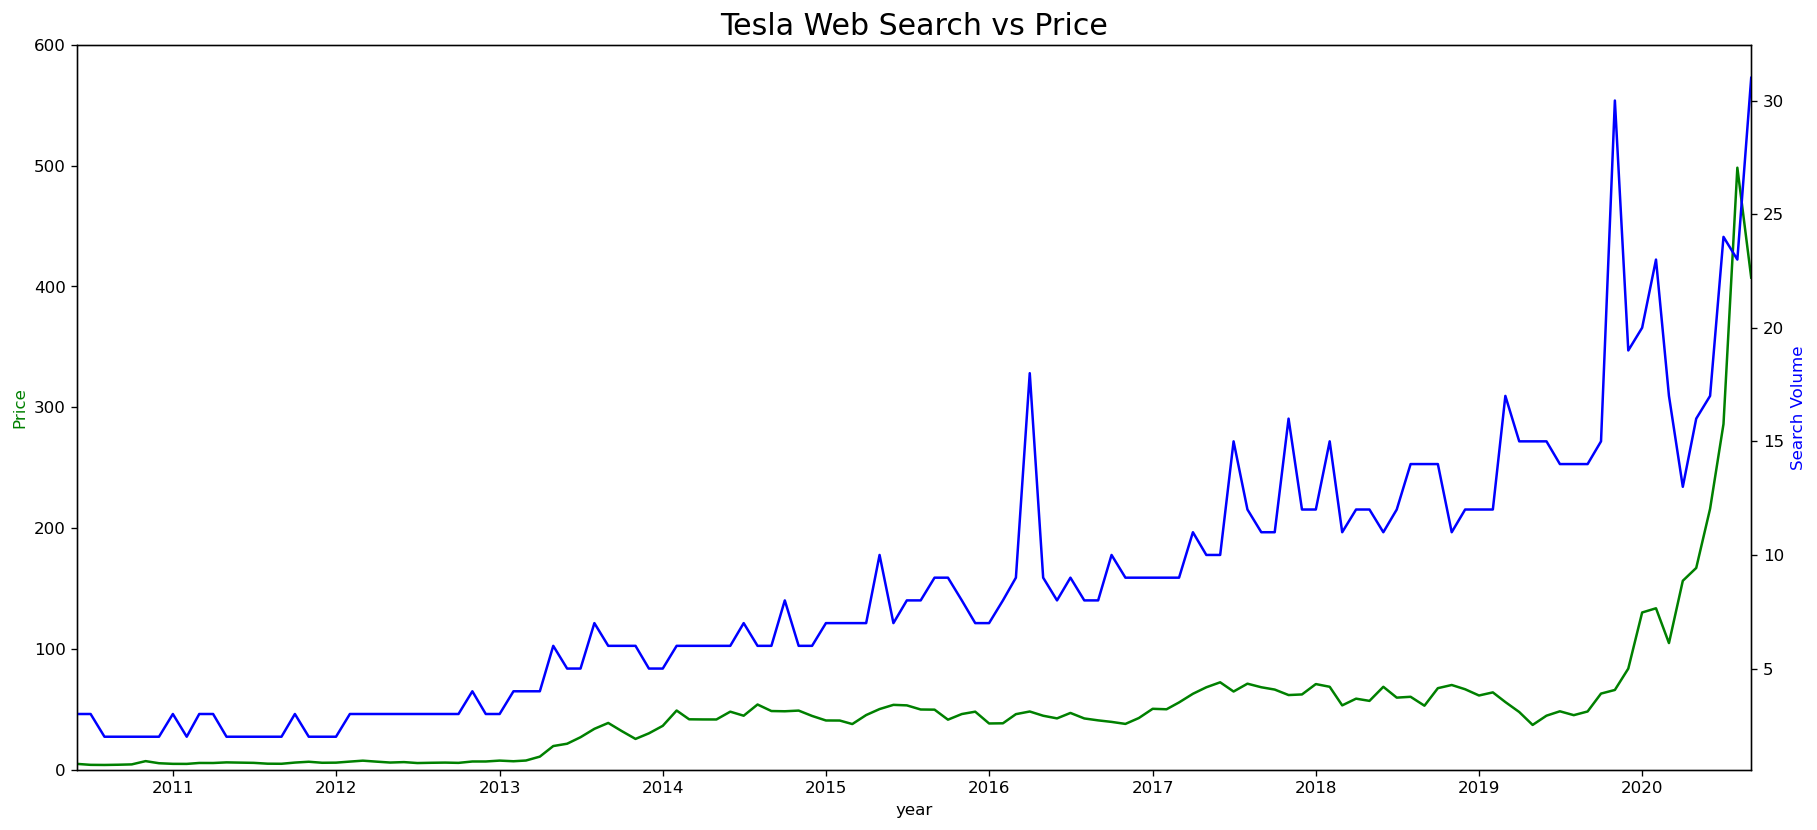

In [25]:
plt.figure(figsize=(18,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() #plot bothon same x axis

ax1.set_ylim([0, 600])
ax1.set_xlim([tesla.MONTH.min(), tesla.MONTH.max()])

ax1.plot(tesla['MONTH'], tesla['TSLA_USD_CLOSE'], 'g')
ax2.plot(tesla['MONTH'], tesla['TSLA_WEB_SEARCH'], 'b')

ax1.set_xlabel('year')
ax1.set_ylabel('Price', color='green')
ax2.set_ylabel('Search Volume', color='blue')

In [26]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

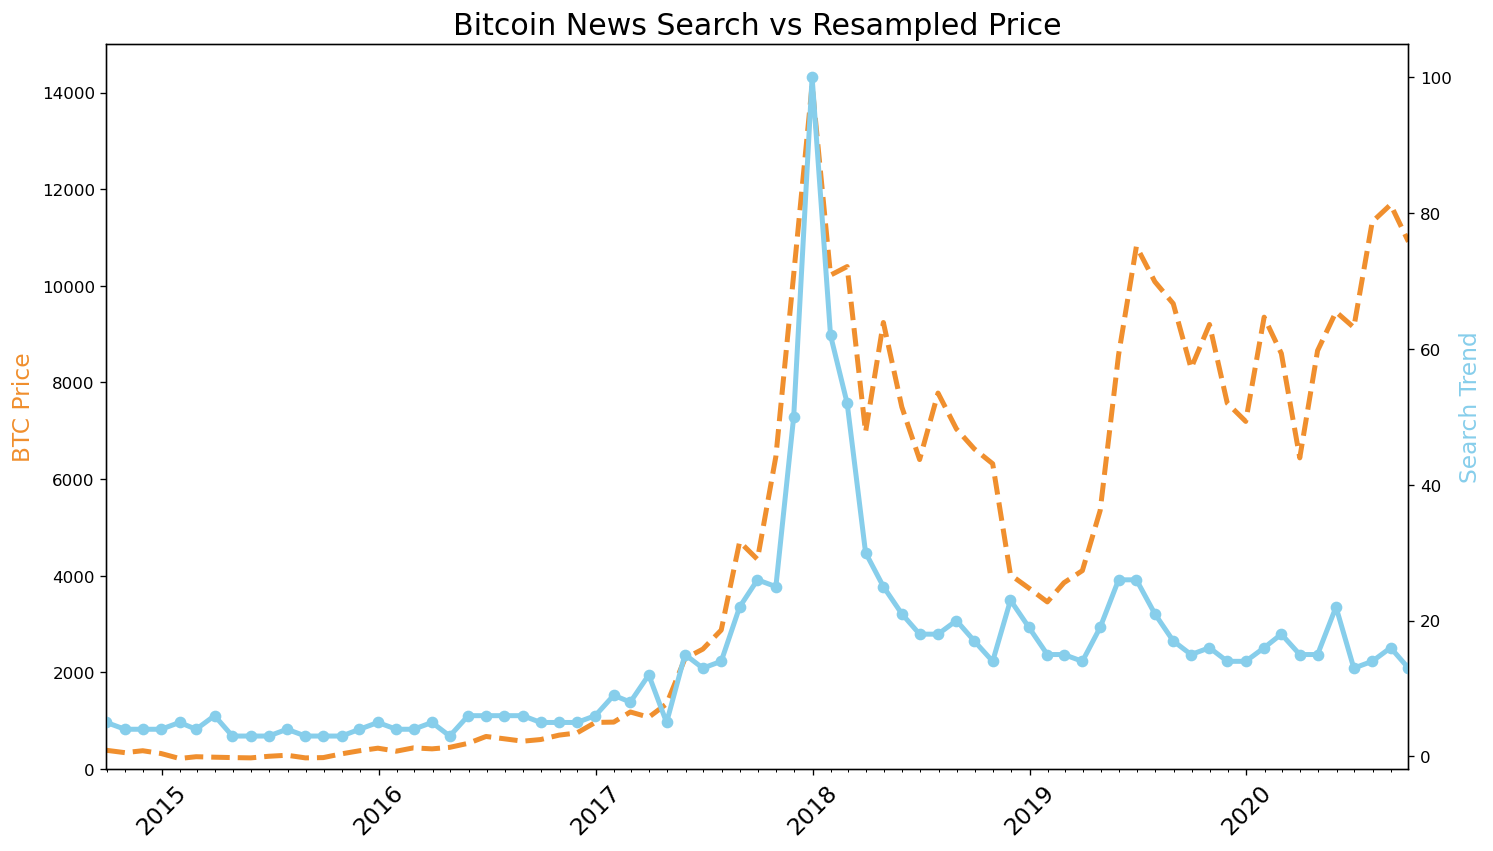

In [29]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
plt.show()

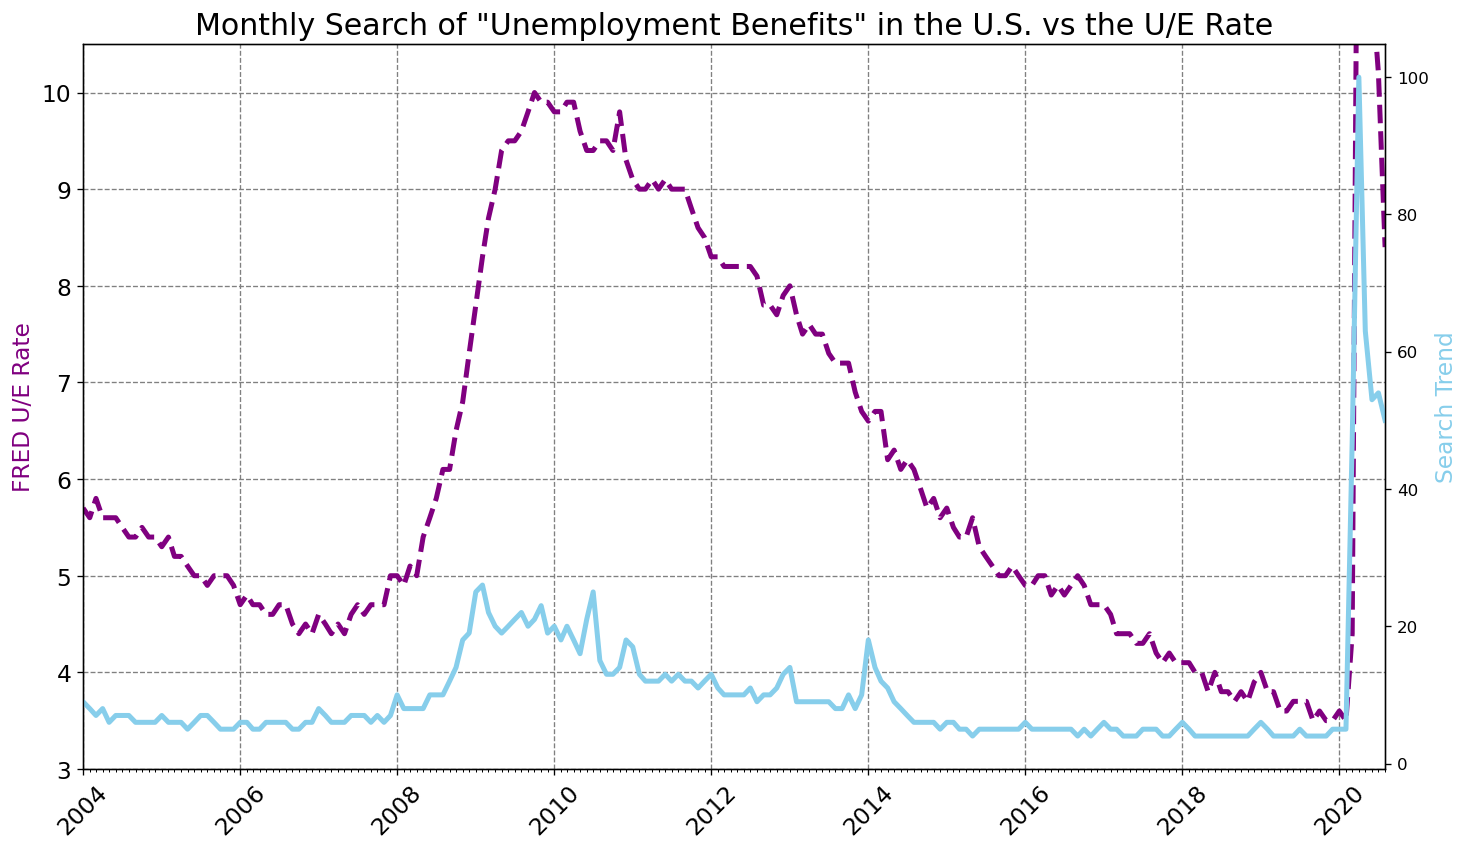

In [33]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([unemployment.MONTH.min(), unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# dataset used
ax1.plot(unemployment.MONTH, unemployment.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(unemployment.MONTH, unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)

plt.show()